In [1]:
import tensorflow as tf

2022-11-14 18:22:14.969544: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [ ]:
### 8.2 TensorFlow and Keras

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

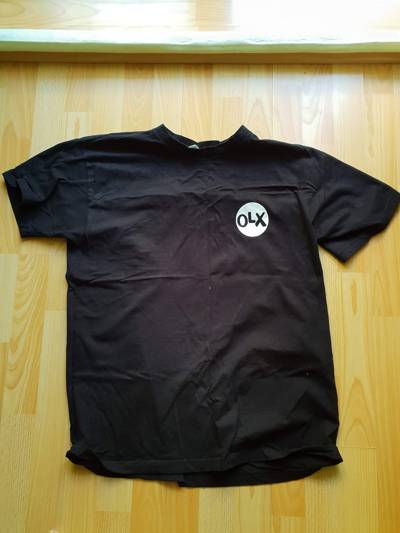

In [5]:
path = 'clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
import numpy as np

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
### 8.3 Pre-trained convolutional neural networks

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-14 18:22:38.926725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:22:38.933471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:22:38.934196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:22:38.935801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

2022-11-14 18:22:49.429750: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-14 18:22:50.181358: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-14 18:22:50.182307: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-14 18:22:50.182348: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-14 18:22:50.183413: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-14 18:22:50.183525: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

In [ ]:
### 8.4 Convolutional neural networks

In [ ]:
### 8.5 Tranfser learning

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
!ls -l clothing-dataset-small/train

total 260
drwxrwsr-x 2 jovyan jovyan 20480 Nov 14 15:13 dress
drwxrwsr-x 2 jovyan jovyan 12288 Nov 14 15:13 hat
drwxrwsr-x 2 jovyan jovyan 36864 Nov 14 15:13 longsleeve
drwxrwsr-x 2 jovyan jovyan 16384 Nov 14 15:13 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Nov 14 15:13 pants
drwxrwsr-x 2 jovyan jovyan 20480 Nov 14 15:13 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Nov 14 15:13 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Nov 14 15:13 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Nov 14 15:13 skirt
drwxrwsr-x 2 jovyan jovyan 69632 Nov 14 15:13 t-shirt


In [20]:
X, y = next(train_ds)

In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False, #significa que solo usamos el conv. layer 
    input_shape=(150, 150, 3)
)

base_model.trainable = False
#trainable_false = freeze convolutional layers



In [25]:
#create a new top V1
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [26]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 1s 1s/step


(32, 10)

In [27]:
#train the model
learning_rate = 0.01 #similar to eta
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

#loss nos dice que tan bueno es el modelo como rsm
loss = keras.losses.CategoricalCrossentropy(from_logits=True)


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
#epochs = go over the data 10 times
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 163ms/step - loss: 1.2552 - accuracy: 0.6728 - val_loss: 0.9427 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5865 - accuracy: 0.8162 - val_loss: 0.7972 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3644 - accuracy: 0.8761 - val_loss: 0.9694 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2354 - accuracy: 0.9143 - val_loss: 0.8247 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1542 - accuracy: 0.9469 - val_loss: 0.8502 - val_accuracy: 0.7947
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0985 - accuracy: 0.9645 - val_loss: 0.8928 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1152 - accuracy: 0.9580 - val_loss: 1.0625 - val_accuracy: 0.7742

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

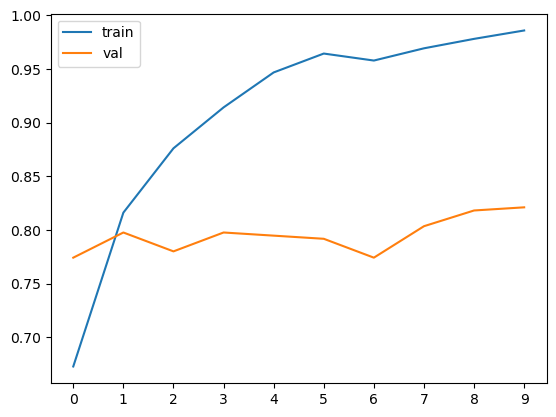

In [33]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
## 8.6 Adjusting the learning rate

In [34]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.9987 - accuracy: 0.3302 - val_loss: 1.6392 - val_accuracy: 0.4751
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.4328 - accuracy: 0.5482 - val_loss: 1.2559 - val_accuracy: 0.6364
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 1.1657 - accuracy: 0.6261 - val_loss: 1.0623 - val_accuracy: 0.6745
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 1.0165 - accuracy: 0.6848 - val_loss: 0.9427 - val_accuracy: 0.7243
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9194 - accuracy: 0.7128 - val_loss: 0.8700 - val_accuracy: 0.7302
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.8484 - accuracy: 0.7301 - val_loss: 0.8100 - val_accuracy: 0.7537
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7949 - accuracy: 0.7477 - val_loss: 0.7713 - val_accuracy:

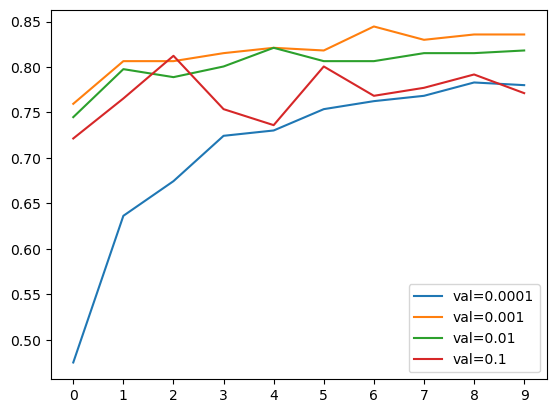

In [38]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [39]:
del scores[0.1]
del scores[0.0001]

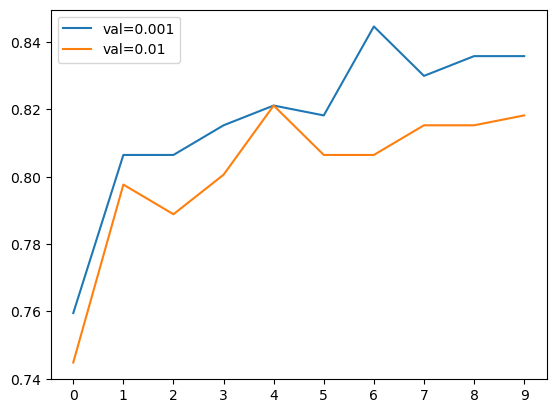

In [42]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [43]:
learning_rate = 0.001

In [ ]:
## 8.7 Checkpointing

Saving the best model only
Training a model with callbacks

In [44]:
model.save_weights('model_v1.h5', save_format='h5')

In [45]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [46]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 139ms/step - loss: 1.1069 - accuracy: 0.6235 - val_loss: 0.6948 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6325 - accuracy: 0.7803 - val_loss: 0.6105 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5147 - accuracy: 0.8269 - val_loss: 0.5731 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4300 - accuracy: 0.8628 - val_loss: 0.5459 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 12s 127ms/step - loss: 0.3748 - accuracy: 0.8862 - val_loss: 0.5435 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3280 - accuracy: 0.9048 - val_loss: 0.5277 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2912 - accuracy: 0.9136 - val_loss: 0.5347 - val_accuracy: 0.8328

In [ ]:
## 8.8 Adding more layers

Adding one inner dense layer
Experimenting with different sizes of inner layer

In [47]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.5084 - accuracy: 0.5192 - val_loss: 1.1156 - val_accuracy: 0.6745
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9876 - accuracy: 0.6770 - val_loss: 0.8354 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.7403 - accuracy: 0.7591 - val_loss: 0.7183 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.6031 - accuracy: 0.7969 - val_loss: 0.6560 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5235 - accuracy: 0.8334 - val_loss: 0.6533 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4581 - accuracy: 0.8563 - val_loss: 0.5806 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4077 - accuracy: 0.8729 - val_loss: 0.6223 - val_accuracy: 0.7

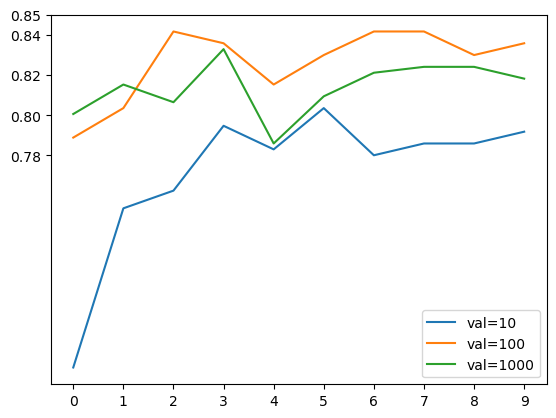

In [52]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.84, 0.85])
plt.legend()

In [ ]:
## 8.9 Regularization and dropout

Regularizing by freezing a part of the network
Adding dropout to our model
Experimenting with different values

In [53]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [54]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 16s 134ms/step - loss: 0.9605 - accuracy: 0.6741 - val_loss: 0.6161 - val_accuracy: 0.7947
Epoch 2/30
96/96 [==============================] - 12s 124ms/step - loss: 0.5007 - accuracy: 0.8246 - val_loss: 0.5631 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 12s 124ms/step - loss: 0.3629 - accuracy: 0.8784 - val_loss: 0.5431 - val_accuracy: 0.8094
Epoch 4/30
96/96 [==============================] - 12s 124ms/step - loss: 0.2468 - accuracy: 0.9237 - val_loss: 0.5386 - val_accuracy: 0.8123
Epoch 5/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1767 - accuracy: 0.9501 - val_loss: 0.5662 - val_accuracy: 0.8065
Epoch 6/30
96/96 [==============================] - 12s 124ms/step - loss: 0.1266 - accuracy: 0.9743 - val_loss: 0.5435 - val_accuracy: 0.8299
Epoch 7/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0852 - accuracy: 0.9844 - val_loss: 0.6061 - val_accuracy: 0.

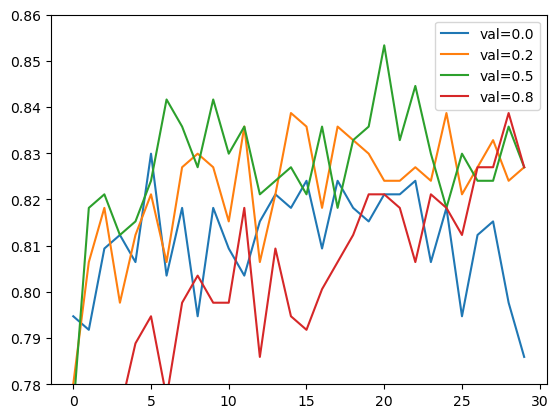

In [58]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

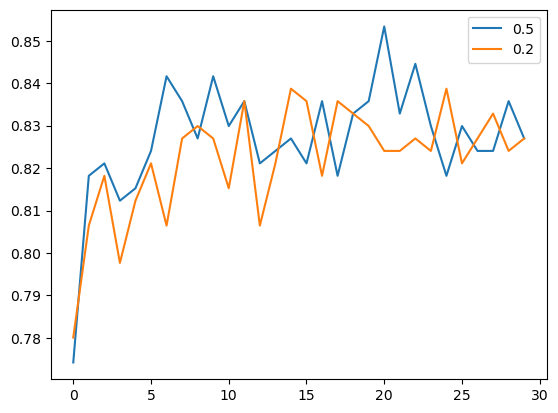

In [59]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))


In [ ]:
## 8.10 Data augmentation

Different data augmentations
Training a model with augmentations
How to select data augmentations?

In [60]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [61]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 15s 136ms/step - loss: 1.0731 - accuracy: 0.6362 - val_loss: 0.6847 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 12s 121ms/step - loss: 0.6293 - accuracy: 0.7816 - val_loss: 0.6118 - val_accuracy: 0.7977
Epoch 3/50
96/96 [==============================] - 12s 124ms/step - loss: 0.4684 - accuracy: 0.8334 - val_loss: 0.5887 - val_accuracy: 0.8123
Epoch 4/50
96/96 [==============================] - 12s 122ms/step - loss: 0.3552 - accuracy: 0.8784 - val_loss: 0.5818 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 12s 124ms/step - loss: 0.2871 - accuracy: 0.9100 - val_loss: 0.5675 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 12s 122ms/step - loss: 0.2254 - accuracy: 0.9270 - val_loss: 0.5543 - val_accuracy: 0.8299
Epoch 7/50
96/96 [==============================] - 12s 122ms/step - loss: 0.1821 - accuracy: 0.9443 - val_loss: 0.5767 - val_accuracy: 0.8035

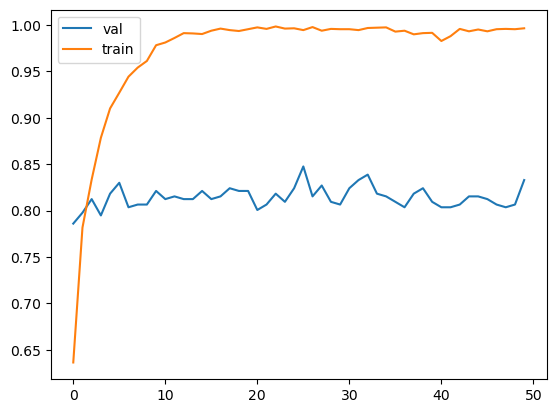

In [62]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [ ]:
## 8.11 Training a larger model

Train a 299x299 model

In [63]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [64]:
input_size = 299

In [65]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [66]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [67]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 73s 723ms/step - loss: 1.0278 - accuracy: 0.6780 - val_loss: 0.5643 - val_accuracy: 0.8182
Epoch 2/50
96/96 [==============================] - 68s 704ms/step - loss: 0.5309 - accuracy: 0.8162 - val_loss: 0.4438 - val_accuracy: 0.8416
Epoch 3/50
96/96 [==============================] - 67s 695ms/step - loss: 0.4474 - accuracy: 0.8514 - val_loss: 0.4247 - val_accuracy: 0.8651
Epoch 4/50
96/96 [==============================] - 67s 696ms/step - loss: 0.3901 - accuracy: 0.8716 - val_loss: 0.4049 - val_accuracy: 0.8651
Epoch 5/50
96/96 [==============================] - 67s 694ms/step - loss: 0.3494 - accuracy: 0.8804 - val_loss: 0.3741 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 69s 715ms/step - loss: 0.3148 - accuracy: 0.8941 - val_loss: 0.3638 - val_accuracy: 0.8827
Epoch 7/50
96/96 [==============================] - 69s 714ms/step - loss: 0.2945 - accuracy: 0.9045 - val_loss: 0.3715 - val_accuracy: 0.8768

KeyboardInterrupt: 

In [ ]:
## 8.12 Using the model

Loading the model
Evaluating the model
Getting predictions

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [70]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [71]:
model = keras.models.load_model('xception_v4_1_11_0.894.h5')

In [72]:
model.evaluate(test_ds)

12/12 [==============================] - 5s 317ms/step - loss: 0.2858 - accuracy: 0.9032


[0.2857663631439209, 0.9032257795333862]

In [73]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [74]:
img = load_img(path, target_size=(299, 299))

In [75]:
import numpy as np

In [76]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [77]:
X = preprocess_input(X)

In [78]:
pred = model.predict(X)

1/1 [==============================] - 1s 655ms/step


In [79]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [80]:
dict(zip(classes, pred[0]))

{'dress': -0.5170237,
 'hat': -2.6786642,
 'longsleeve': -1.0289679,
 'outwear': 0.57606244,
 'pants': 10.698652,
 'shirt': -0.68863714,
 'shoes': -2.730355,
 'shorts': 5.5459495,
 'skirt': -2.1066015,
 't-shirt': -1.9525522}